## Preparing for colab
Before using colab, you will need to upload the contents of the programming hw code to your google drive (unzipped).

Once it has been uploaded, you can create a colab notebook.

The following steps demonstrate how to connect your collab notebook with the files you have uploaded and how to run your scripts in your notebook as terminal commands.


In [1]:
# Mount your google drive. You may have to give colab permissions for accessing your google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This is the present working directory. Note, shell commands in colab have a "!" in front of them!
!pwd

/content


In [3]:
# Change working directory to where you have uploaded the zip folder contents (in your google drive)
# Note that this shell command starts with "%", which tells colab to change the working directory.
# your directory may be different!
%cd /content/drive/MyDrive/hw3/2022_code 
# List directory contents
!ls -la 

/content/drive/MyDrive/hw3/2022_code
total 1170
-rw------- 1 root root   43200 Mar 15 06:07 best_model_predictions.csv
-rw------- 1 root root   43200 Mar 18 12:06 convnet_predictions.csv
drwx------ 2 root root    4096 Mar 18 15:29 datasets
-rw------- 1 root root   43200 Mar 19 18:38 densenet_predictions.csv
-rw------- 1 root root    7672 Mar 18 17:59 ex_main_bestmodel.py
-rw------- 1 root root      20 Mar 18 17:04 ex_predictions.csv
-rw------- 1 root root 1014514 Mar 19 19:21 How2SetUpColabHW3.ipynb
drwx------ 2 root root    4096 Mar 18 16:37 .ipynb_checkpoints
drwx------ 2 root root    4096 Mar 18 15:29 log_files
-rw------- 1 root root    7653 Mar 19 19:05 main_bestmodel.py
-rw------- 1 root root    6118 Mar 19 19:05 main_convnet.py
-rw------- 1 root root    6799 Mar 19 18:57 main_densenet.py
drwx------ 2 root root    4096 Mar 18 15:29 model_files
-rw------- 1 root root      61 Mar  9 17:45 reqs.txt
-rw------- 1 root root    1627 Mar  9 17:45 run.sh
drwx------ 2 root root    4096 Mar 

In [ ]:
# Now when you run "pwd", you can see that your working directory has been changed to pwd
!pwd

/content/drive/MyDrive/hw3/2022_code


In [4]:
!pip uninstall imgaug
!pip install imgaug==0.2.5

Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.2.9
     |████████████████████████████████| 562 kB 7.1 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561438 sha256=d64a140e30f2dcb0edca114c329cc582a9ab4e19bd2fd64e631d7923012601c4
  Stored in directory: /root/.cache/pip/wheels/60/dd/38/d1dc2cad2b6a66dc0249261004990bccb0f27985c74ba26e49
Successfully built imgaug


In [5]:
# Install requirements for python.
!pip install -r reqs.txt

     |████████████████████████████████| 13.5 MB 8.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3


In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
images = np.load("/content/drive/MyDrive/hw3/2022_code/datasets/fruit_images.npy") 
labels = np.load("/content/drive/MyDrive/hw3/2022_code/datasets/fruit_labels.npy")

In [ ]:
import torch

num, height, width = images.shape


In [ ]:
def normalize(dataset):
  image = np.zeros(dataset.shape)
  for i in range(len(dataset)):
    x = dataset[i]
    std = np.std(x, dtype=np.float64)
    mean = np.mean(x, dtype=np.float64)
    x = (x - mean) / std
    image[i] = x
    x = []
  return image

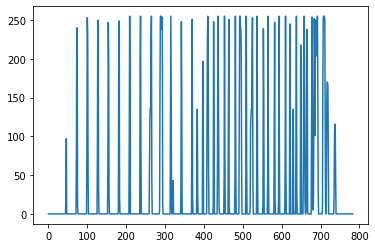

In [ ]:
images = images.reshape(num, height*width)
class_n_images = images[labels == 0]
plt.plot(class_n_images[0])

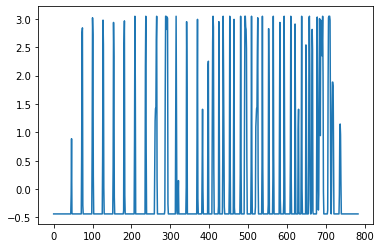

In [ ]:
normalized_img = normalize(images)
normalized_img = normalized_img.reshape(num, height*width)
class_n_images = normalized_img[labels == 0]
plt.plot(class_n_images[0])

In [ ]:
# Run a sample command (this command won't run because not all args are provided, 
# which will give the required arguments and the formatting of the arguments needed.
!python main_densenet.py

usage: main_densenet.py [-h] [--dataDir DATA_DIR] [--logDir LOG_DIR]
                        [--modelSaveDir MODEL_SAVE_DIR]
                        [--predictionsFile PREDICTIONS_FILE] --mode
                        {train,predict} [--LR LR] [--bs BS] [--epochs EPOCHS]
                        [--weights WEIGHTS]
main_densenet.py: error: the following arguments are required: --mode


In [ ]:
# 2 layer NN
!python main_densenet.py --mode "train" \
                        --dataDir "datasets" \
                        --logDir "log_files" \
                        --modelSaveDir "model_files" \
                        --LR 0.001 \
                        --bs 100 \
                        --epochs 2000


main_densenet.py:108: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = torch.from_numpy(TRAIN_LABELS[i].astype(np.int))
On step 0:	Train loss 1.6752960681915283	|	Dev acc is 0.34847222222222224
On step 100:	Train loss 0.5871444344520569	|	Dev acc is 0.7962962962962963
On step 200:	Train loss 0.5234281420707703	|	Dev acc is 0.8216203703703704
On step 300:	Train loss 0.4930453300476074	|	Dev acc is 0.832962962962963
On step 400:	Train loss 0.45767802000045776	|	Dev acc is 0.8443518518518518
On step 500:	Train loss 0.4500221610069275	|	Dev acc is 0

In [21]:
!python main_densenet.py --mode "predict" \
              --dataDir "datasets" \
              --weights "model_files/densenet.pt" \
              --predictionsFile "densenet_predictions.csv"

Storing predictions in densenet_predictions.csv


In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
ff_metrics = pd.read_csv('./log_files/convnet.log')

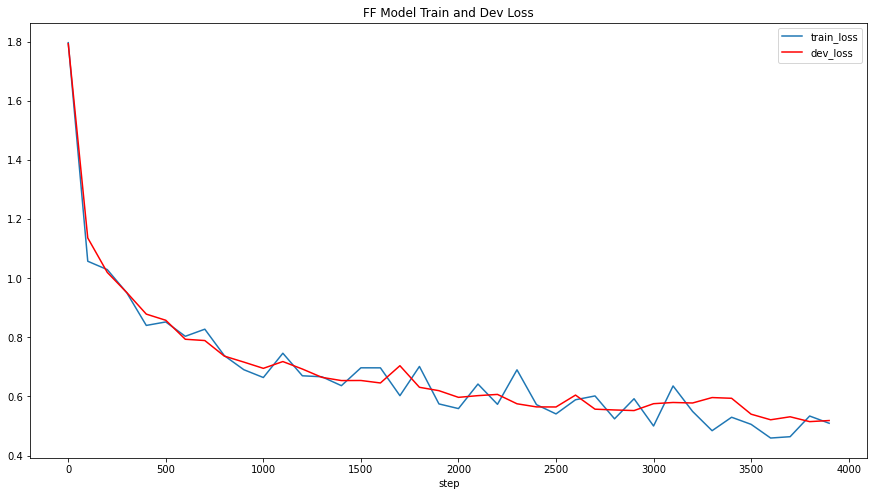

In [19]:
plt.figure(figsize=(15, 8))
plt.title("FF Model Train and Dev Loss")
ax = plt.gca() 
ff_metrics.plot(kind='line',x='step',y='train_loss',ax=ax) 
ff_metrics.plot(kind='line',x='step',y='dev_loss', color='red', ax=ax) 
plt.show()

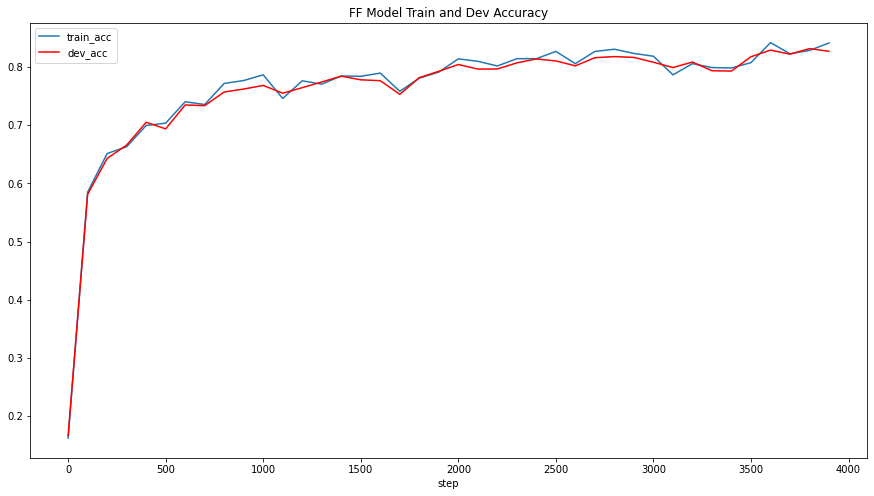

final dev acc is:0.8269444444444445


In [20]:
plt.figure(figsize=(15, 8))
plt.title("FF Model Train and Dev Accuracy")
ax = plt.gca()
ff_metrics.plot(kind='line',x='step',y='train_acc',ax=ax) 
ff_metrics.plot(kind='line',x='step',y='dev_acc', color='red', ax=ax) 
plt.show()
print("final dev acc is:" + str(ff_metrics['dev_acc'].values[-1]))

In [17]:
!python main_convnet.py --mode "train" \
              --dataDir "datasets" \
              --logDir "log_files" \
              --modelSaveDir "model_files" \
              --LR 0.01 \
              --bs 600 \
              --epochs 4000

main_convnet.py:105: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = torch.from_numpy(TRAIN_LABELS[i].astype(np.int))
On step 0:	Train loss 1.7965325117111206	|	Dev acc is 0.16666666666666666
On step 100:	Train loss 1.1362113952636719	|	Dev acc is 0.5811574074074074
On step 200:	Train loss 0.9972203969955444	|	Dev acc is 0.6428703703703704
On step 300:	Train loss 0.9602665901184082	|	Dev acc is 0.6658796296296297
On step 400:	Train loss 0.8636431097984314	|	Dev acc is 0.7049537037037037
On step 500:	Train loss 0.8622816801071167	|	Dev acc is 0.

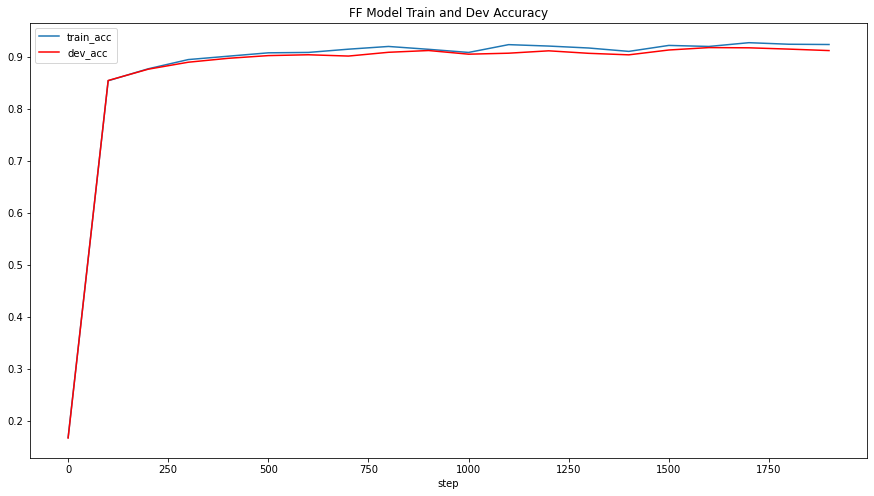

final dev acc is:0.9123148148148148


In [50]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
ff_metrics = pd.read_csv('./log_files/bestmodel.log')
plt.figure(figsize=(15, 8))
plt.title("FF Model Train and Dev Accuracy")
ax = plt.gca()
ff_metrics.plot(kind='line',x='step',y='train_acc',ax=ax) 
ff_metrics.plot(kind='line',x='step',y='dev_acc', color='red', ax=ax) 
plt.show()
print("final dev acc is:" + str(ff_metrics['dev_acc'].values[-1]))

In [37]:
!python main_convnet.py --mode "predict" \
            --dataDir "datasets" \
            --weights "model_files/convnet.pt" \
            --predictionsFile "convnet_predictions.csv"

Storing predictions in convnet_predictions.csv


In [51]:
!python main_bestmodel.py --mode "train" \
              --dataDir "datasets" \
              --logDir "log_files" \
              --modelSaveDir "model_files" \
              --LR 0.01 \
              --bs 400 \
              --epochs 2000

main_bestmodel.py:120: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = torch.from_numpy(TRAIN_LABELS[i].astype(np.int))
On step 0:	Train loss 1.7957396507263184	|	Dev acc is 0.16666666666666666
On step 100:	Train loss 0.5332499146461487	|	Dev acc is 0.835925925925926
On step 200:	Train loss 0.4300483465194702	|	Dev acc is 0.8608333333333333
On step 300:	Train loss 0.3412560820579529	|	Dev acc is 0.8840740740740741
On step 400:	Train loss 0.35966363549232483	|	Dev acc is 0.8755555555555555
On step 500:	Train loss 0.33059245347976685	|	Dev acc is

In [34]:
!python main_bestmodel.py --mode "predict" \
                        --dataDir "datasets" \
                        --weights "model_files/bestmodel.pt" \
                        --predictionsFile "best_model_predictions.csv"

Storing predictions in best_model_predictions.csv


In [ ]:
ff_metrics = pd.read_csv('./log_files/bestmodel.log')
acc = ff_metrics.accurate[19]
nacc = ff_metrics.not_accurate[19]
# find index of classified image and mis-classified image
print(acc)
print(nacc)

{0: (array([0]), array([0])), 1: (array([0]), array([1])), 3: (array([0]), array([2])), 4: (array([0]), array([3])), 6: (array([0]), array([4])), 7: (array([0]), array([5])), 8: (array([0]), array([6])), 9: (array([0]), array([7])), 10: (array([0]), array([8])), 11: (array([0]), array([9])), 12: (array([0]), array([10])), 13: (array([0]), array([11])), 14: (array([0]), array([12])), 15: (array([0]), array([13])), 16: (array([0]), array([14])), 17: (array([0]), array([15])), 19: (array([0]), array([16])), 20: (array([0]), array([17])), 21: (array([0]), array([18])), 22: (array([0]), array([19])), 23: (array([0]), array([20])), 24: (array([0]), array([21])), 25: (array([0]), array([22])), 26: (array([0]), array([23])), 27: (array([0]), array([24])), 28: (array([0]), array([25])), 29: (array([0]), array([26])), 30: (array([0]), array([27])), 31: (array([0]), array([28])), 32: (array([0]), array([29])), 33: (array([0]), array([30])), 34: (array([0]), array([31])), 35: (array([0]), array([3

In [ ]:
import numpy as np

img_array = np.load('/content/drive/MyDrive/hw3/2022_code/datasets/fruit_dev_images.npy')

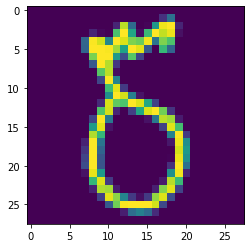

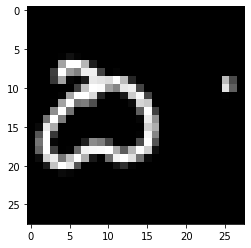

In [ ]:
from matplotlib import pyplot as plt

# store 10 classified image into ex_acc
acc_idx = [0,1,3,4,6,7,8,9,10,11]
ex_acc_labels = [labels[i] for i in acc_idx]
ex_acc = [img_array[i] for i in acc_idx]
plt.imshow(ex_acc[0])
plt.show()

# store 10 mis-classified image into ex_acc
nacc_idx = [2,5,18,47,70,71,75,89,98,100]
ex_nacc = [img_array[i] for i in nacc_idx]
plt.imshow(ex_nacc[0], cmap='gray')
plt.show()

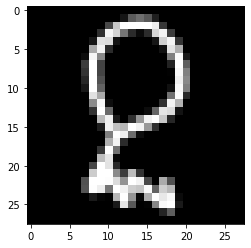

In [ ]:
for i in range(10):
  ex_acc[i] = np.flipud(ex_acc[i])
plt.imshow(ex_acc[0], cmap='gray')
plt.show()

In [ ]:
np.save('datasets/data.npy', ex_acc)
!python main_bestmodel.py --mode "predict" \
              --dataDir "datasets" \
              --weights "model_files/bestmodel.pt" \
              --predictionsFile "ex_predictions.csv"

main_bestmodel.py:17: RuntimeWarning: invalid value encountered in true_divide
  x = (x - mean) / std
Storing predictions in ex_predictions.csv


In [ ]:
ex_acc_labels

[4, 0, 2, 5, 2, 2, 2, 3, 1, 0]

In [ ]:
from scipy.ndimage import gaussian_filter
def gaussian_transform(data):
  row,col= data.shape
  mean = np.mean(data, dtype=np.float64)
  r = np.ptp(data,axis=1)
  r = np.ptp(r,axis=0)
  sigma = r/10
  gauss = np.random.normal(mean,sigma,(row,col))
  gauss = gauss.reshape(row,col)
  data = data + gauss
  return data

In [ ]:
for i in range(10):
  ex_acc[i] = gaussian_transform(ex_acc[i])
  ex_acc[i] = np.array(ex_acc[i], dtype=float)


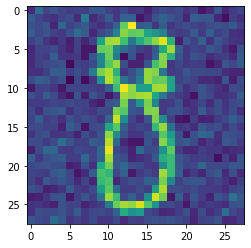

In [ ]:
plt.imshow(ex_acc[2])
plt.show()

In [52]:
# Run the test script with sample commands 
!bash run.sh

main_densenet.py:108: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = torch.from_numpy(TRAIN_LABELS[i].astype(np.int))
On step 0:	Train loss 1.6473523378372192	|	Dev acc is 0.3951851851851852
On step 100:	Train loss 0.5589212775230408	|	Dev acc is 0.8026388888888889
On step 200:	Train loss 0.5206277370452881	|	Dev acc is 0.8236111111111111
On step 300:	Train loss 0.4745093286037445	|	Dev acc is 0.8326388888888889
On step 400:	Train loss 0.42973724007606506	|	Dev acc is 0.8422222222222222
On step 500:	Train loss 0.4367949664592743	|	Dev acc is 0